In [1]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
################################################# MULTI CLASS #####################################################

In [4]:
sales=pd.read_csv('SalesData.csv')

In [5]:
sales.head()

,Month,Week,Account,Customer.Name,Zone,Bran,Actual NR,Actual Volume
0,Apr-18,13,102457,SANJEEV INDUSTRIAL CORPORATION,NORTH,FBAD,43173,122
1,Apr-18,13,103671,BAJRANG STEEL (SALES) CORPORATION,EAST,GWAH,57033,26
2,Apr-18,13,115806,NARESH STEEL INDUSTRIES PVT. LTD.,WEST,BOMB,45777,24
3,Apr-18,13,116735,RAKESH STEELS,NORTH,FBAD,42901,49
4,Apr-18,13,117556,S C SHETTAR AND SONS,SOUTH,BANG,54506,32


In [6]:
df1=pd.read_csv('MyData.csv')

In [7]:
df1.head()

,BusA,CCAr,Reference,Account,Customer.Name,Zone,Bran,Ty,Status,Local.Crcy.Amt,...,Doc.Chq.dt,Month,Pstng.Date,Net.Due.Dt,G.L,Year,Clrng.doc.,Clearing,Pending_Amy,pending_cnt
0,1000,BPR,4.132000e+09,929488,KAUSALYA AGENCIES,South,SBAD,RV,Not OD,0.10,...,31.12.2018,Dec,31-12-18,05-01-19,1221001,2019,94177601,31-12-18,0.00,0
1,9600,BPR,1.115502e+09,928860,TATA STEEL PROCESSING,North,GBAD,RV,Overdue,0.04,...,31.10.2018,Oct,31-10-18,10-11-18,1221001,2019,93892774,15-11-18,0.60,4
2,9600,BPR,1.115502e+09,928860,TATA STEEL PROCESSING,North,GBAD,RV,Not OD,0.12,...,05.11.2018,Nov,05-11-18,15-11-18,1221001,2019,93892774,15-11-18,1.42,10
3,1000,BPR,2.412166e+09,928860,TATA STEEL PROCESSING,North,GBAD,RV,Overdue,0.17,...,30.12.2018,Dec,30-12-18,09-01-19,1221001,2019,94398427,14-01-19,0.00,0
4,2500,BPR,2.410320e+09,928860,TATA STEEL PROCESSING,North,GBAD,RV,Overdue,0.16,...,03.11.2018,Nov,03-11-18,13-11-18,1221001,2019,93892774,15-11-18,1.26,9


In [8]:
df1['Week']=pd.to_datetime(df1['Pstng.Date'],dayfirst=True).dt.week
df1['Pstng.Date']=pd.to_datetime(df1['Pstng.Date'],dayfirst=True)

In [9]:
df4=df1[df1['Account']==159021]
ts=df4[['Pstng.Date','pending_cnt']]

In [10]:
ts.to_csv('ts.csv')

In [11]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('ts.csv', parse_dates=['Pstng.Date'], index_col='Pstng.Date')


In [12]:
data.head()

,Unnamed: 0,pending_cnt
Pstng.Date,,
2018-06-30,13867,27
2018-06-30,13871,27
2018-07-28,13873,23
2018-07-26,13874,7
2018-06-30,13876,27


In [13]:
data.drop(columns='Unnamed: 0',inplace=True)

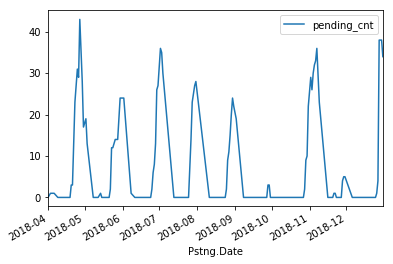

In [14]:
data.plot()

In [15]:
ts=data

In [16]:
from statsmodels.tsa.stattools import acf, pacf

In [17]:
lag_acf = acf(ts, nlags=20)
lag_pacf = pacf(ts, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

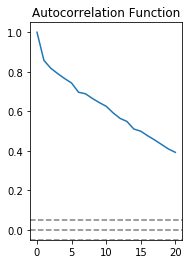

In [18]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5, 1.0, 'Autocorrelation Function')

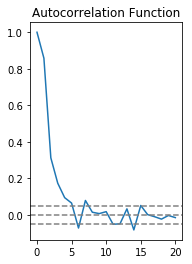

In [19]:
plt.subplot(121) 
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [20]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data, order=(8,2,37))  
results_ARIMA = model.fit(disp=-1)

C:\Users\Laptop\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Laptop\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

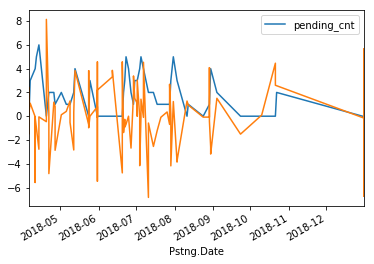

In [106]:
ts.plot()
results_ARIMA.fittedvalues.plot()


In [92]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Pstng.Date
2018-06-25   -0.001857
2018-05-25   -0.002930
2018-10-21    2.603958
2018-10-21    4.459653
2018-05-06    0.404585
dtype: float64


In [93]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Pstng.Date
2018-06-25   -0.001857
2018-05-25   -0.004787
2018-10-21    2.599172
2018-10-21    7.058825
2018-05-06    7.463410
dtype: float64


In [94]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Pstng.Date
2018-04-06    3.720608
2018-04-06    6.134754
2018-04-06    6.446807
2018-04-06    3.720608
2018-04-06    6.134754
dtype: float64

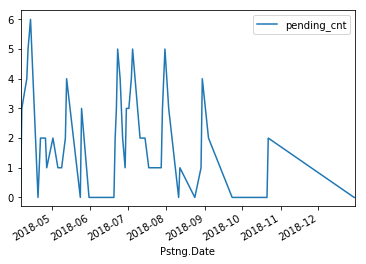

In [103]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
ts.plot()


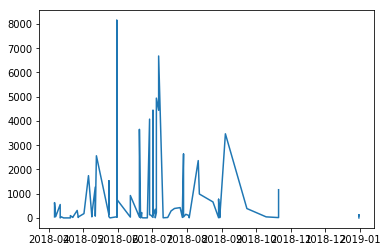

In [102]:
plt.plot(predictions_ARIMA)

In [21]:
df2=df1[['Pstng.Date','Clearing','Status']]

In [22]:
df2.head()

,Pstng.Date,Clearing,Status
0,2018-12-31,31-12-18,Not OD
1,2018-10-31,15-11-18,Overdue
2,2018-11-05,15-11-18,Not OD
3,2018-12-30,14-01-19,Overdue
4,2018-11-03,15-11-18,Overdue


In [23]:
df2.dropna(inplace=True)


In [25]:
df2['Range of Delay']=pd.to_datetime(df2['Clearing'],dayfirst=True)-pd.to_datetime(df2['Net.Due.Dt'],dayfirst=True)

KeyError: 'Net.Due.Dt'

In [135]:
df2['Range of Delay'].head()

0    0 days
1   15 days
2   10 days
3   15 days
4   12 days
Name: Range of Delay, dtype: timedelta64[ns]

In [136]:

df2['Range of Delay']=df2['Range of Delay'].dt.days
#df['Difference'] = pd.to_numeric(df['Difference']) 
df2['Range of Delay']=pd.to_numeric(df2['Range of Delay'])
#df2['Range of Delay']

In [137]:
df2 = df2.reset_index()
df2.drop(columns='index',inplace=True)

In [138]:
df2.head()

,Pstng.Date,Clearing,Status,Range of Delay
0,2018-12-31,31-12-18,Not OD,0
1,2018-10-31,15-11-18,Overdue,15
2,2018-11-05,15-11-18,Not OD,10
3,2018-12-30,14-01-19,Overdue,15
4,2018-11-03,15-11-18,Overdue,12


In [139]:
df2['Status'] = np.where(df2['Range of Delay'] > 7, 2, (np.where(df2['Range of Delay'] > 0, 1,0)))

In [140]:
df2['Status'].value_counts()

0    52548
2    33565
1    27599
Name: Status, dtype: int64

In [141]:
df1['Status']=df2['Status']

In [142]:
df1.head(5)

,BusA,CCAr,Reference,Account,Customer.Name,Zone,Bran,Ty,Status,Local.Crcy.Amt,...,Month,Pstng.Date,Net.Due.Dt,G.L,Year,Clrng.doc.,Clearing,Pending_Amy,pending_cnt,Week
0,1000,BPR,4.132000e+09,929488,KAUSALYA AGENCIES,South,SBAD,RV,0,0.10,...,Dec,2018-12-31,05-01-19,1221001,2019,94177601,31-12-18,0.00,0,1
1,9600,BPR,1.115502e+09,928860,TATA STEEL PROCESSING,North,GBAD,RV,2,0.04,...,Oct,2018-10-31,10-11-18,1221001,2019,93892774,15-11-18,0.60,4,44
2,9600,BPR,1.115502e+09,928860,TATA STEEL PROCESSING,North,GBAD,RV,2,0.12,...,Nov,2018-11-05,15-11-18,1221001,2019,93892774,15-11-18,1.42,10,45
3,1000,BPR,2.412166e+09,928860,TATA STEEL PROCESSING,North,GBAD,RV,2,0.17,...,Dec,2018-12-30,09-01-19,1221001,2019,94398427,14-01-19,0.00,0,52
4,2500,BPR,2.410320e+09,928860,TATA STEEL PROCESSING,North,GBAD,RV,2,0.16,...,Nov,2018-11-03,13-11-18,1221001,2019,93892774,15-11-18,1.26,9,44


In [143]:
df1.dropna(inplace=True)
df1['Status']=df1['Status'].astype('category').cat.codes
df1['BusA']=df1['BusA'].astype('category').cat.codes
df1['CCAr']=df1['CCAr'].astype('category').cat.codes
#df['Account']=df['Account'].astype('category').cat.codes
#df1.drop(columns='Reference',inplace=True)
df1.drop(columns='Customer.Name',inplace=True)
df1.drop(columns=['DocumentNo','Month','Year','Clrng.doc.'],inplace=True)
df1['Zone']=df1['Zone'].astype('category').cat.codes
df1['Bran']=df1['Bran'].astype('category').cat.codes
df1['PayT'] = df1['PayT'].astype('category').cat.codes
df1.drop(columns='Doc.Chq.dt',inplace=True)
df1.drop(columns='Ty',inplace=True)
df1.drop(columns='Sale.Type',inplace=True)
df1.head(5)

,BusA,CCAr,Reference,Account,Zone,Bran,Status,Local.Crcy.Amt,Arr..Clearing...Net.Due.Date.,PayT,Pstng.Date,Net.Due.Dt,G.L,Clearing,Pending_Amy,pending_cnt,Week
0,0,0,4.132000e+09,929488,2,21,0,0.10,-5,27,2018-12-31,05-01-19,1221001,31-12-18,0.00,0,1
1,6,0,1.115502e+09,928860,1,9,2,0.04,5,31,2018-10-31,10-11-18,1221001,15-11-18,0.60,4,44
2,6,0,1.115502e+09,928860,1,9,2,0.12,0,31,2018-11-05,15-11-18,1221001,15-11-18,1.42,10,45
3,0,0,2.412166e+09,928860,1,9,2,0.17,5,31,2018-12-30,09-01-19,1221001,14-01-19,0.00,0,52
4,2,0,2.410320e+09,928860,1,9,2,0.16,2,31,2018-11-03,13-11-18,1221001,15-11-18,1.26,9,44


In [144]:
df1['Pstng.Date']=pd.to_datetime(df1['Pstng.Date']).dt.strftime("%Y%m%d").astype(str)
df1['Net.Due.Dt']=pd.to_datetime(df1['Net.Due.Dt']).dt.strftime("%Y%m%d").astype(str)
df1['Clearing']=pd.to_datetime(df1['Clearing']).dt.strftime("%Y%m%d").astype(str)

In [146]:
df1.drop(columns=['Net.Due.Dt','Clearing'],inplace=True)

In [147]:
df1 = df1.reset_index()
df1.drop(columns='index',inplace=True)

In [148]:
df1.drop(columns='Arr..Clearing...Net.Due.Date.',inplace=True)

In [149]:
y=np.array(df1['Status'])
df1.drop(columns='Status',inplace=True)

In [ ]:
##############  normalizing data ##########################

In [ ]:
from sklearn import preprocessing
y1=df1.columns
x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled,columns=df1.columns)
df1.head(5)

In [156]:
X=df1

In [157]:
k,count=np.unique(y,return_counts=True)
count

array([52548, 27599, 33565], dtype=int64)

In [158]:
############# SPLITTING DATA ###################

In [159]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense 

In [ ]:
y_train = keras.utils.to_categorical(ytrain,3)
y_test = keras.utils.to_categorical(ytest,3)

In [ ]:
ytrain,y_train

In [ ]:
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=len(xtrain.columns), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6,  activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# compile and fit model
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
model.fit(xtrain, y_train, epochs=20, validation_data=(xtest, y_test))

In [ ]:
yo=model.predict(xtest)

In [ ]:
yo

In [ ]:
foo=np.argmax(yo,axis=1)

In [ ]:
foo

In [ ]:
from sklearn import metrics
print("Accuracy: for Neural",metrics.accuracy_score(ytest, y)*100)

In [ ]:
################### RANDOM FOREST ########################

In [160]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators = 100, criterion='entropy',random_state = 0)
model.fit(xtrain, ytrain)
y2=model.predict(xtest)

In [161]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
print("Accuracy: for Random Forest",metrics.accuracy_score(ytest, y2)*100)
#print('ROC SCORE:',roc_auc_score(ytest, y2))
print(pd.Series(model.feature_importances_,index=df1.columns).sort_values(ascending=False))


Accuracy: for Random Forest 96.01336694612182
PayT              0.321489
Reference         0.133745
Pending_Amy       0.129041
pending_cnt       0.105676
BusA              0.061116
Account           0.053205
Pstng.Date        0.045686
Bran              0.041413
Zone              0.040686
Week              0.035105
Local.Crcy.Amt    0.032839
G.L               0.000000
CCAr              0.000000
dtype: float64


In [162]:
unique, counts = np.unique(ytest, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y2, return_counts=True)
print(dict(zip(unique, counts)))
print()
print('Confusion Matrix for Random Forest')
print(metrics.confusion_matrix(y2, ytest))
print('------------------------------------------------------------------------------------------------')

{0: 15826, 1: 8359, 2: 9929}
{0: 15941, 1: 8139, 2: 10034}

Confusion Matrix for Random Forest
[[15498   384    59]
 [  297  7614   228]
 [   31   361  9642]]
------------------------------------------------------------------------------------------------


In [ ]:
################### Decision tress  #####################

In [ ]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth=100)
ytree =decision_tree.fit(xtrain, ytrain)
ytreepred=decision_tree.predict(xtest)
print("Accuracy for Decision Trees:",metrics.accuracy_score(ytreepred,ytest)*100)

In [ ]:
unique, counts = np.unique(ytest, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(ytreepred, return_counts=True)
print(dict(zip(unique, counts)))
print()
print('Confusion Matrix for Decision Trees')
print(metrics.confusion_matrix(ytreepred, ytest))
print('------------------------------------------------------------------------------------------------')

In [ ]:
print(pd.Series(decision_tree.feature_importances_,index=df1.columns).sort_values(ascending=False))

In [ ]:
probad=decision_tree.predict_proba(xtest)
probad

In [ ]:
############################################  KNN ##################################

In [ ]:
from sklearn import neighbors

In [ ]:
limit=10

In [ ]:
#for i in range(limit):
#    mo = neighbors.KNeighborsClassifier(n_neighbors =i+2)
#    mo.fit(xtrain, ytrain)
#    predict = mo.predict(xtest)
#    print("Accuracy: for KNN :",metrics.accuracy_score(predict, ytest)*100,'for k= ',(i+2))

In [ ]:
mo = neighbors.KNeighborsClassifier(n_neighbors =2)
mo.fit(xtrain, ytrain)
predict = mo.predict(xtest)
print("Accuracy: for KNN :",metrics.accuracy_score(predict, ytest)*100)

In [ ]:
probak=mo.predict_proba(xtest)

In [ ]:
np.unique(probak)

In [ ]:
arr,count=np.unique(predict,return_counts=True)
print(arr,count)

In [ ]:
print()
print('Confusion Matrix for KNN')
print(metrics.confusion_matrix(predict, ytest))

In [ ]:
unique, counts = np.unique(ytest, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(predict, return_counts=True)
print(dict(zip(unique, counts)))
print('---------------------------------------------------------------------------------------------')

In [ ]:
######################################### SVM  ####################################

In [ ]:
#from sklearn import svm

In [ ]:
#clf = svm.SVC(kernel='linear') # Linear Kernel

In [ ]:
#clf.fit(xtrain, ytrain)

In [ ]:
#yp=clf.predict(xtest)
#print("Accuracy: for SVM",metrics.accuracy_score(ytest, yp))
#print()
#print(metrics.confusion_matrix(ytest, yp))

In [ ]:
#unique, counts = np.unique(ytest, return_counts=True)
#print(dict(zip(unique, counts)))
#unique, counts = np.unique(yp, return_counts=True)
#print(dict(zip(unique, counts)))
#print('---------------------------------------------------------------------------------------------')

In [ ]:
#############################   ADABOOST   ##############################################

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=decision_tree,n_estimators=100, random_state=0)
clf.fit(xtrain, ytrain)  

In [ ]:
yout=clf.predict(xtest)

In [ ]:
print("Accuracy: for Adaboost :",metrics.accuracy_score(ytest, yout)*100)

In [ ]:
print()
print('Confusion Matrix for KNN WITH ADABOOST')
print(metrics.confusion_matrix(yout, ytest))

In [ ]:
######################################################################################

In [ ]:
########################### VOTING  ##########################

In [ ]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('dt',decision_tree ), ('knn', mo), ('adaboost', clf), ('RF',model)],voting='soft', weights=[2, 0.5, 3,8])
eclf1 = eclf.fit(xtrain, ytrain)
eclf2=eclf.predict(xtest)

In [ ]:
voteprob=eclf.predict_proba(xtest)

In [ ]:
print("Accuracy: for Adaboost :",metrics.accuracy_score(ytest, eclf2)*100)

In [ ]:
print()
print('Confusion Matrix for Voting')
print(metrics.confusion_matrix(eclf2, ytest))

In [ ]:
##################################################################################

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagging = BaggingClassifier(mo,max_samples=0.5, max_features=0.5)
bagging.fit(xtrain,ytrain)
ybag=bagging.predict(xtest)
print("Accuracy: for Bagging :",metrics.accuracy_score(ytest, ybag)*100)

In [ ]:
print()
print('Confusion Matrix for Bagging')
print(metrics.confusion_matrix(ybag, ytest))